********************************************************************************************************************************************
BANK PERSONAL LOAN ANALYSIS
--
                                                     
                     -Harish M (harishm.cb19@bitsathy.ac.in)
********************************************************************************************************************************************

-------------------------------------------------------------------------------------------------------------------------------------------
Importing the Datasets and Required Libraries
------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd                         #To convert Python's list, dictionary or Numpy array into dataframe
import numpy as np                          #To perform a number of mathematical operations on arrays
import matplotlib.pyplot as plt             #To plot the data  
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')          #Imported the Bank_Personal_Loan_Modelling Dataset
feature=df.drop("Personal Loan",axis=1)
target=df["Personal Loan"]
accuracy={}                                                           #Created a dictionary to know accuracy of various model 
df= feature.join(target)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


--------------------------------------------------------------------------------------------------------------------------------------------
EXPLORATORY DATA ANALYSIS
---
--------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
list=[]
for col in df.columns:
    list.append([col,df[col].dtype,df[col].isna().sum(), df[col].nunique()])
    '''Col ->is the column names 
       df[col].dtype->Datatype of the column
       df[col].isna().sum()->null values count 
       df[col].nunique()->unique value count
    '''
print(pd.DataFrame(columns=['col','Data_types','Null Value count','Unique Value'],data=list))  
#WE can see that there is no null value in our data so no need to clean the data

                   col Data_types  Null Value count  Unique Value
0                   ID      int64                 0          5000
1                  Age      int64                 0            45
2           Experience      int64                 0            47
3               Income      int64                 0           162
4             ZIP Code      int64                 0           467
5               Family      int64                 0             4
6                CCAvg    float64                 0           108
7            Education      int64                 0             3
8             Mortgage      int64                 0           347
9   Securities Account      int64                 0             2
10          CD Account      int64                 0             2
11              Online      int64                 0             2
12          CreditCard      int64                 0             2
13       Personal Loan      int64                 0             2


In [4]:
print((df == 0).astype(int).sum(axis=0))
#counts the number of zeros in each column

ID                       0
Age                      0
Experience              66
Income                   0
ZIP Code                 0
Family                   0
CCAvg                  106
Education                0
Mortgage              3462
Securities Account    4478
CD Account            4698
Online                2016
CreditCard            3530
Personal Loan         4520
dtype: int64


--------------------------------------------------------------------------------------------------------------------------------------------
DATA CLEANING
--
--------------------------------------------------------------------------------------------------------------------------------------------

Irregular value analysis

In [5]:
pd.DataFrame(df[df["Experience"]<0][["Age","Experience"]].sort_values("Age")).head()
#It seems there are negative values in experience

,Age,Experience
2717,23,-2
3130,23,-2
3425,23,-1
2962,23,-2
909,23,-1


In [6]:
df["Experience"] = df["Experience"].apply(abs)

--------------------------------------------------------------------------------------------------------------------------------------------
CORRELATION USING HEAT MAP
--------------------------
--------------------------------------------------------------------------------------------------------------------------------------------

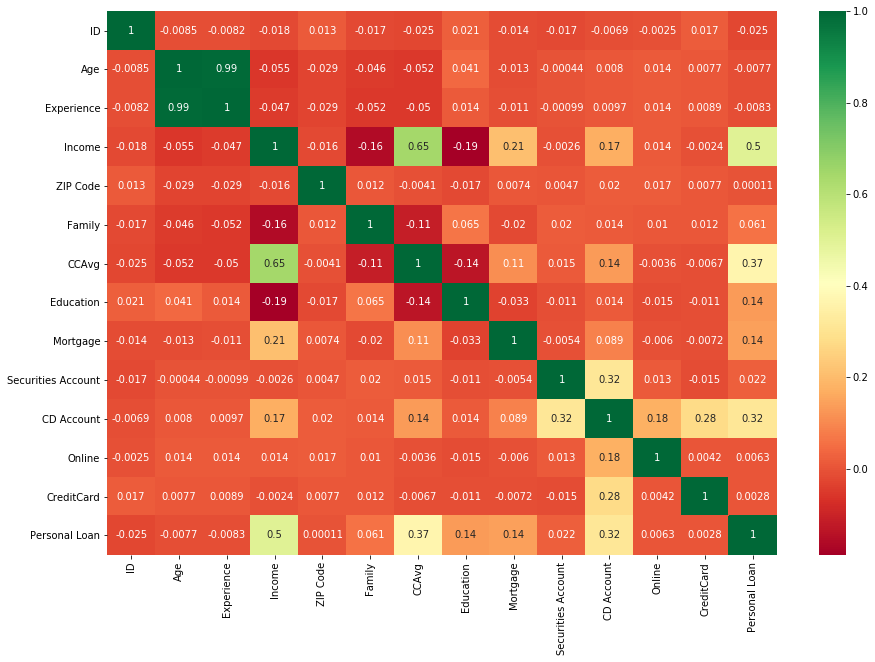

In [7]:
import seaborn as sns
X = df.iloc[:,0:13]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
df.describe()
df[["Age","Experience","Income","CCAvg","Mortgage"]] = df[["Age","Experience","Income","CCAvg","Mortgage"]].astype(float)
#we are seperating numerical data

--------------------------------------------------------------------------------------------------------------------------------------------
PLOTTING AND ANALYZING THE DATA
--
--------------------------------------------------------------------------------------------------------------------------------------------

In [9]:
#finding the count of persons who goes for a personal loan and count of person who don't goes for personal loan
counts =pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
counts.columns =["Labels","Personal Loan"]
counts

,Labels,Personal Loan
0,0,4520
1,1,480


'\nThird and Second Level of Education is higher than proportion among people who has First level of Education.\n'

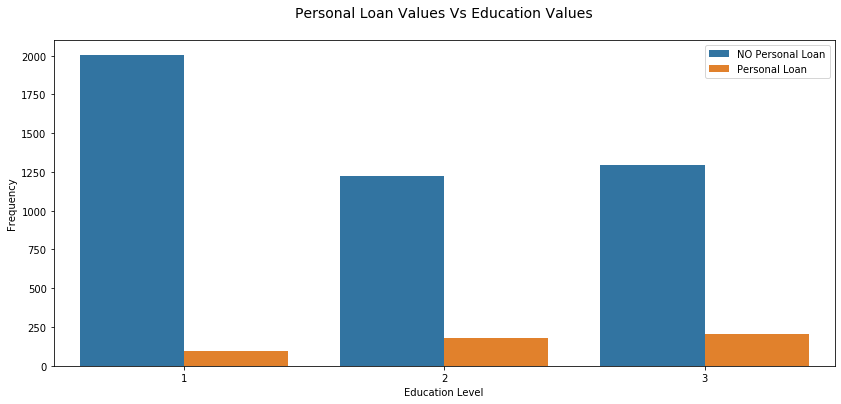

In [10]:
plt.figure(figsize=(14,6))
sns.countplot(x='Education',data=df,hue='Personal Loan')
plt.ylabel('Frequency')
plt.xlabel('Education Level')
plt.xticks(np.arange(3),('1','2','3'), rotation = 'horizontal')
plt.legend(('NO Personal Loan', 'Personal Loan'))
plt.title('Personal Loan Values Vs Education Values', fontsize = 14, y = 1.05);
'''
Third and Second Level of Education is higher than proportion among people who has First level of Education.
'''

'\nThe proportion of persons who has Personal Loan among them who has Family size 3 and 4 is highest proportion.\nSo from this we come to a conclusion that if family size increases person person goes for personal loan\n'

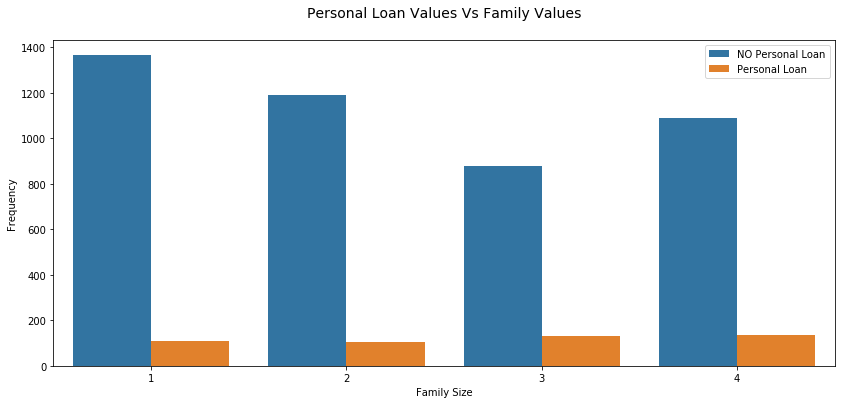

In [11]:
plt.figure(figsize=(14,6))
sns.countplot(x='Family',data=df,hue='Personal Loan')
plt.ylabel('Frequency')
plt.xlabel('Family Size')
plt.xticks(np.arange(4),('1', '2', '3', '4'), rotation = 'horizontal')
plt.legend(('NO Personal Loan', 'Personal Loan'));
plt.title('Personal Loan Values Vs Family Values', fontsize = 14, y = 1.05);
'''
The proportion of persons who has Personal Loan among them who has Family size 3 and 4 is highest proportion.
So from this we come to a conclusion that if family size increases person person goes for personal loan
'''

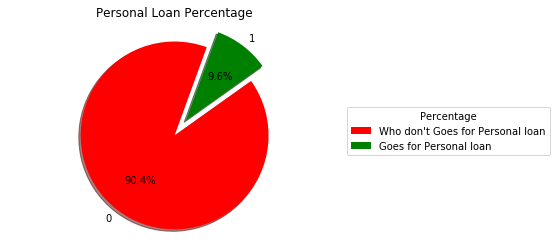

In [12]:
fig1, ax1 = plt.subplots()
explode = (0, 0.20)
ingredients = ["Who don't Goes for Personal loan","Goes for Personal loan"]
ax1.pie(counts["Personal Loan"], explode=explode, labels=counts["Labels"], autopct='%1.1f%%',shadow=True, startangle=70,colors = ['red', 'green'])
ax1.axis('equal')
ax1.legend(ingredients,title="Percentage", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Personal Loan Percentage")
plt.show()
#FROM THIS WE CAN SEE THAT 9.6 PERSON GOES FOR PERSONAL LOAN AND REST DONT

Text(0.5, 1.0, 'CCAvg Distribution')

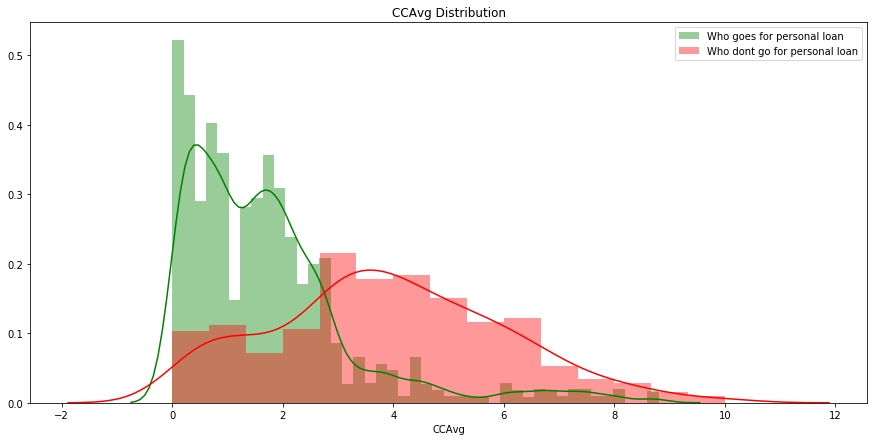

In [13]:
#comparing ccavg with personal loan
plt.figure(figsize=(15,7))
sns.distplot(df[df["Personal Loan"] == 0]['CCAvg'], color = 'g',label='Who goes for personal loan',kde=True)
sns.distplot(df[df["Personal Loan"] == 1]['CCAvg'], color = 'r',label='Who dont go for personal loan',kde=True)
plt.legend()
plt.title("CCAvg Distribution")

Text(0.5, 1.0, 'Income Distribution')

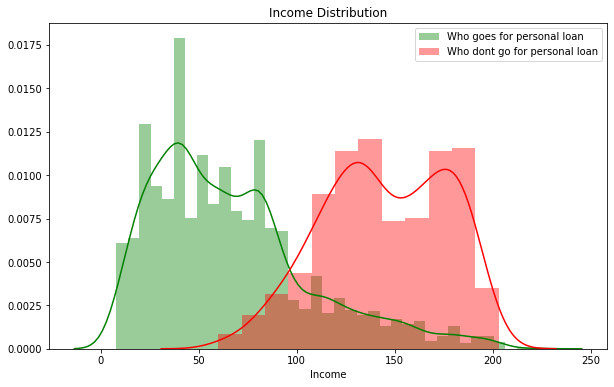

In [14]:
#comparing Income with personal loan
plt.figure(figsize=(10,6))
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'g',label='Who goes for personal loan',kde=True)
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'r',label='Who dont go for personal loan',kde=True)
plt.legend()
plt.title("Income Distribution")

In [15]:
feature = df.drop(["ID","Personal Loan"],axis=1)
target = df["Personal Loan"]

In [16]:
#removing unnecessary columns
feature =feature.drop(["ZIP Code","Age","Online","CreditCard"],axis=1)


In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
scaler = StandardScaler();
colscal=["Experience","Mortgage","Income","CCAvg"]

scaler.fit(feature[colscal])
scaled_features = pd.DataFrame(scaler.transform(feature[colscal]),columns=colscal)

feature =feature.drop(colscal,axis=1)
feature = scaled_features.join(feature)
feature

,Experience,Mortgage,Income,CCAvg,Family,Education,Securities Account,CD Account
0,-1.676408,-0.555524,-0.538229,-0.193371,4,1,1,0
1,-0.099404,-0.555524,-0.864109,-0.250595,3,1,1,0
2,-0.449849,-0.555524,-1.363793,-0.536720,1,1,0,0
3,-0.975517,-0.555524,0.569765,0.436103,1,2,0,0
4,-1.063129,-0.555524,-0.625130,-0.536720,4,2,0,0
...,...,...,...,...,...,...,...,...
4995,-1.501185,-0.555524,-0.733757,-0.021696,1,3,0,0
4996,-1.413574,0.280238,-1.276892,-0.880069,4,1,0,0
4997,1.652823,-0.555524,-1.081363,-0.937294,2,3,0,0
4998,1.740434,-0.555524,-0.538229,-0.822844,3,2,0,0


********************************************************************************************************************************************
LOGISTIC REGRESSION   
--
********************************************************************************************************************************************

In [18]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(feature,target,test_size=0.30,random_state=0) #splitting the data in the ratio 70:30

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = logmodel.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, matthews_corrcoef, roc_auc_score, confusion_matrix, accuracy_score,recall_score,f1_score
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1353,   19],
       [  53,   75]], dtype=int64)

In [23]:
accuracy={}
a=accuracy_score(y_test, y_pred)
accuracy['LR']=a

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1372
           1       0.80      0.59      0.68       128

    accuracy                           0.95      1500
   macro avg       0.88      0.79      0.82      1500
weighted avg       0.95      0.95      0.95      1500



********************************************************************************************************************************************
KNN-KNeighborsClassifier   
-- 
********************************************************************************************************************************************

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [27]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1369,    3],
       [  34,   94]], dtype=int64)

In [29]:
a=accuracy_score(y_test, y_pred)
accuracy['KNN']=a

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1372
           1       0.97      0.73      0.84       128

    accuracy                           0.98      1500
   macro avg       0.97      0.87      0.91      1500
weighted avg       0.98      0.98      0.97      1500



********************************************************************************************************************************************
RFC-Random Forest Classifier    
--
********************************************************************************************************************************************

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
RFC = RandomForestClassifier(n_estimators=101,max_depth=250,max_leaf_nodes=50,random_state=42)
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=250, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=101,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [33]:
y_pred = RFC.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1367,    5],
       [  21,  107]], dtype=int64)

In [35]:
a=accuracy_score(y_test, y_pred)
accuracy['RFC']=a

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1372
           1       0.96      0.84      0.89       128

    accuracy                           0.98      1500
   macro avg       0.97      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500



********************************************************************************************************************************************
Decision Tree Classifier    
--
********************************************************************************************************************************************

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
DT = DecisionTreeClassifier(min_samples_leaf=10)
DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
y_pred = DT.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1366,    6],
       [  16,  112]], dtype=int64)

In [41]:
a=accuracy_score(y_test, y_pred)
accuracy['DT']=a

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1372
           1       0.95      0.88      0.91       128

    accuracy                           0.99      1500
   macro avg       0.97      0.94      0.95      1500
weighted avg       0.99      0.99      0.99      1500



********************************************************************************************************************************************
Support Vector Machine  
--
********************************************************************************************************************************************

In [43]:
from sklearn import svm

svm = svm.SVC(gamma = 0.025, C = 3)
svm.fit(X_train, y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
y_pred = svm.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1368,    4],
       [  32,   96]], dtype=int64)

In [46]:
a=accuracy_score(y_test, y_pred)
accuracy['svm']=a

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1372
           1       0.96      0.75      0.84       128

    accuracy                           0.98      1500
   macro avg       0.97      0.87      0.91      1500
weighted avg       0.98      0.98      0.97      1500



********************************************************************************************************************************************
Naive Bayes Classifier
--
********************************************************************************************************************************************

In [48]:
from sklearn.naive_bayes import GaussianNB  
NB = GaussianNB()  
NB.fit(X_train, y_train)  

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
y_pred = NB.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1254,  118],
       [  53,   75]], dtype=int64)

In [51]:
a=accuracy_score(y_test, y_pred)
accuracy['NB']=a

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1372
           1       0.39      0.59      0.47       128

    accuracy                           0.89      1500
   macro avg       0.67      0.75      0.70      1500
weighted avg       0.91      0.89      0.90      1500



---
ANALYZING THE BEST MODEL
---
----------

In [53]:
accuracy

{'LR': 0.952,
 'KNN': 0.9753333333333334,
 'RFC': 0.9826666666666667,
 'DT': 0.9853333333333333,
 'svm': 0.976,
 'NB': 0.886}

Text(0.5, 1.0, 'Accuracy')

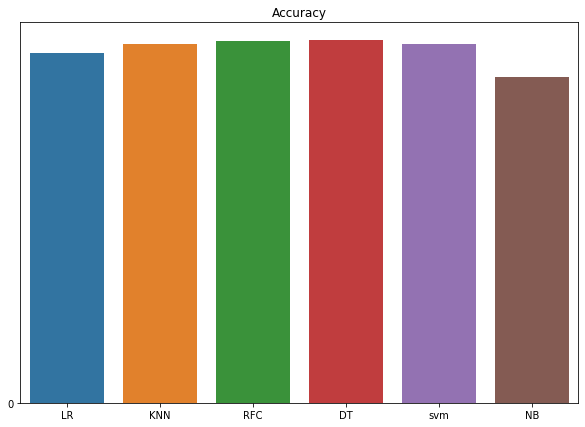

In [54]:
plt.figure(figsize = (10,7))
plt.yticks(np.arange(0,100,10))
y=[]
x=[]

for i in accuracy.keys():
    x.append(i)
for i in accuracy.values():
    y.append(i)

sns.barplot(x , y)
plt.title("Accuracy")

In [55]:
pd.DataFrame(accuracy.items(), columns=["Model", "Accuracy"]) 

,Model,Accuracy
0,LR,0.952000
1,KNN,0.975333
2,RFC,0.982667
3,DT,0.985333
4,svm,0.976000
5,NB,0.886000


--------------------
Conclusion
---
    From the above table we can observe that DT ie Decision tree gives high accuracy than other models.So this model helps to identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
-------------------